# Workbook : Inference

We've spent a lot of time in section getting comfortable with working with data in Python. We've wrangled, explored, and visualized. We've answered questions...but haven't done so in a statistically rigorous way, but will focus on that through the rest of the course. 

In this workbook, we'll work through distributions and regression getting some basic understanding under our belts. Then, next week, you'll have the opportunity to carry out a more in-depth regression analysis.

To get started **run the cell below to import the packages we'll use in this notebook.**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

# Part I : Distributions

Note: This section includes content from a [section workbook](https://github.com/robloughnan/cogs108_w19-section/blob/master/Week_7/Distributions_and_Ordinary_Least_Squares.ipynb) developed and authored by **Rob Laughnan**, a former COGS PhD stduent.   

In this section, we will look at different distributions and plot them out. Additionally, we will consider what types of processes might have generated each of these distributions.

The `scipy.stats` module has many useful distributions from which simulated data can be generated. Below import the following from `scipy.stats`:

- `uniform`
- `norm`
- `bernoulli`
- `poisson`

In [11]:
### BEGIN SOLUTION
from scipy.stats import uniform, norm, bernoulli, poisson
### END SOLUTION

In [12]:
assert uniform
assert norm
assert bernoulli
assert poisson

Each of these distributions are represented as classes by `scipy`. In order to generate a random sample from each of these distributions, we'll use the method `rvs()`. We will generate 1000 samples for each distribution and plot them out using a histogram. The argument you'll define specifies the number of samples (the argument in the rvs method is `size`). 

A reminder that you can alwas look at the documentation when using something new or unfamiliar. In order to do this use `?` (e.g. `uniform?`) and look at the methods section of the documentation to see what arguments `rvs` takes.

### Uniform Distribution

**Use `uniform.rvs` and assign its output to the variable `samples`. In this function, specify the location (`loc`) parameter to be 100, set the `scale` to be 20, and the sample `size` to be 1000.**

Note: For these distributions, I want you to look up the documentation to understand the parameters you need to use and to get used to understanding python documentation.

In [13]:
### BEGIN SOLUTION
samples = uniform.rvs(loc=100, scale=20, size=1000)
### END SOLUTION

In [14]:
assert len(samples)==1000
assert isinstance(samples, np.ndarray)

**Now, generate a histogram of this distribution**

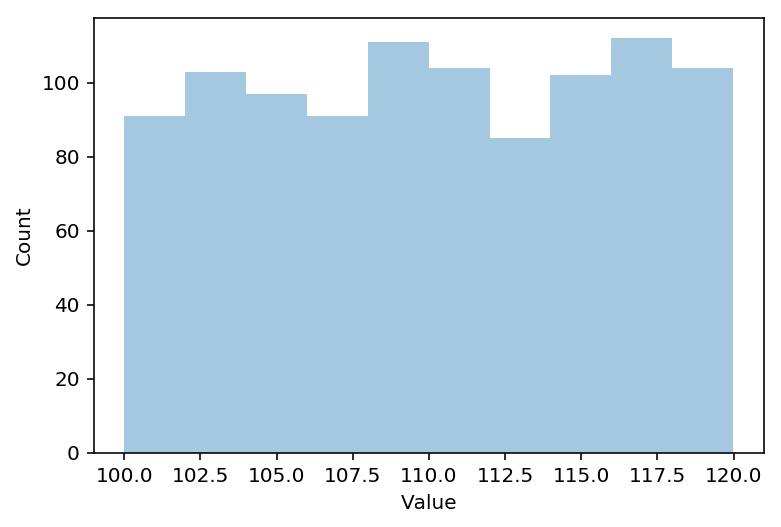

In [6]:
### BEGIN SOLUTION
sns.distplot(samples, kde=False)
plt.ylabel('Count')
plt.xlabel('Value');
### END SOLUTION

Consider what would happen if you had fewer observations? more observations? What if you changed other parameters specified above? Feel free to play around and change the input parameters and see if your intution about how the distribution will change are correct.

In [ ]:
# feel free to include observations/note here.

### Normal Distribution

**Now, step through the same process to generate a histogram, but this time for a Normal distribution of the same sample size with a mean of 100 and standard deviation of 15.**

/anaconda3/envs/cogs18/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


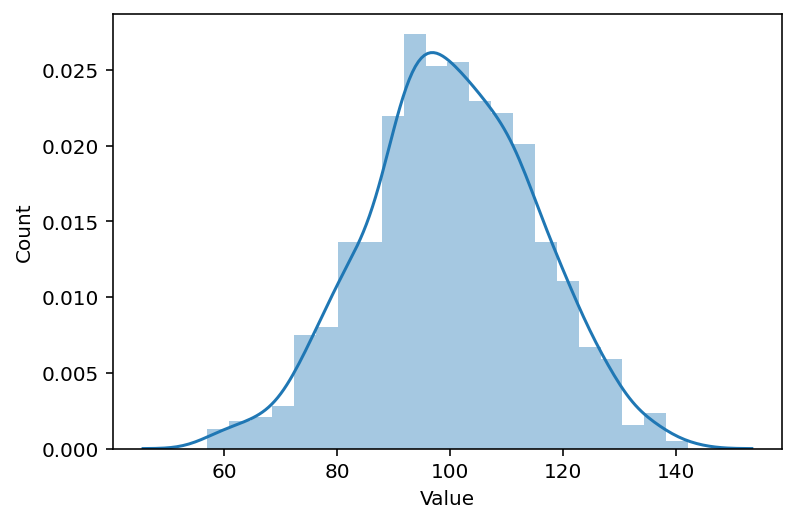

In [9]:
### BEGIN SOLUTION
samples = norm.rvs(size=1000, loc=100, scale=15)
sns.distplot(samples)
plt.ylabel('Count')
plt.xlabel('Value');
### END SOLUTION

Consider what would happen if you had fewer observations? more observations? What if you changed other parameters specified above? Feel free to play around and change the input parameters and see if your intution about how the distribution will change are correct.

In [ ]:
# feel free to include observations/note here.

### Bernoulli Distribution

**Do the same but for a Bernoulli distribution with a probabiliy of 0.5 and a size of 1000.**

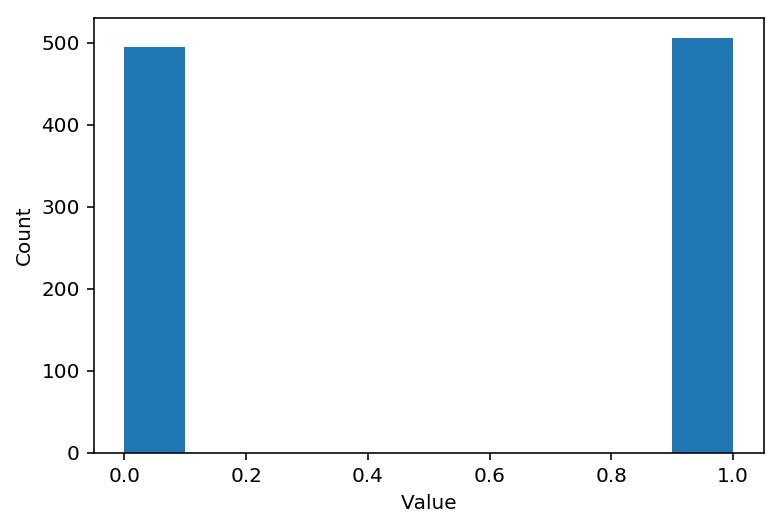

In [8]:
### BEGIN SOLUTION
## YOUR CODE HERE
plt.hist(bernoulli.rvs(p=0.5, size=1000)),
plt.ylabel('Count')
plt.xlabel('Value');
### END SOLUTION

### Poisson Distribution

**Finally, create a histogram for a distribution of the same size for a Poisson distribution with mean 4.**

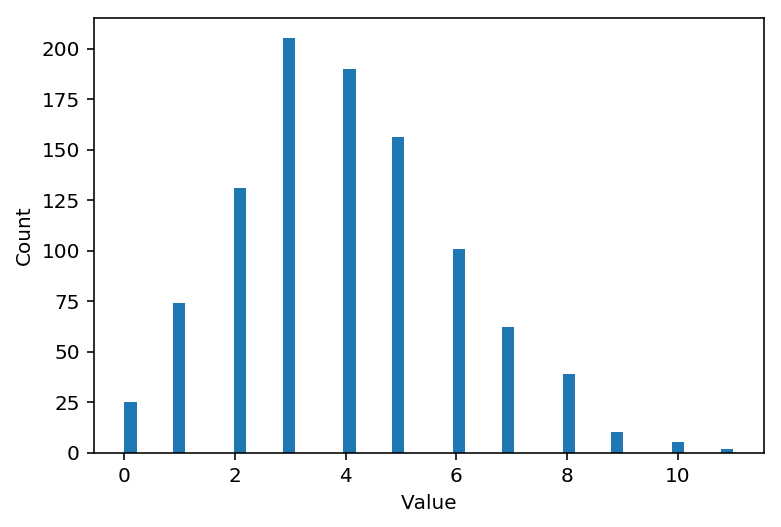

In [9]:
### BEGIN SOLUTION
samples = poisson.rvs(mu=4, size=1000)
plt.hist(samples, bins=50),
plt.ylabel('Count')
plt.xlabel('Value');
### END SOLUTION

**Distributions in the real world**

Think about and/or discuss with your classmates which distribution matches each of the data generation processes you just generated?

- Toss of a coin 
- The serial number of any dollar bill chosen at random
- The number of hurricanes in a given year
- IQ scores in the general population

In [ ]:
### BEGIN ANSWER
# **Answers:**
# - Toss of a coin (**Bernoulli**)
# - The serial number of any dollar bill chosen at random (**Uniform**)
# - The number of hurricanes in a given year (**Poisson**)
# - IQ scores in the general population (**Normal**)
### END ANSWER

# Part II : Data Simulation & Correlation

This week, we're just trying to understand the principles behind inference, so we're going to simulate data. However, next week, you'll work with a real dataset to answer a question using inference.

We are going to simulate idealized age and income data using these distributions. First **create an array `age` that has 1000 random samples of a uniform distribution from 0 to 80 (Hint: you can use multiplication to scale the interval you desire). Additionally, create another array, `income`, with 1000 samples from a normal distribution that has a mean of 30 and a standard-deviation of 10 (working in units of 1000s of dollars).**

In [25]:
### BEGIN SOLUTION
age = uniform.rvs(size=1000)*80
income = norm.rvs(loc=30, scale=10, size=1000)
### END SOLUTION

In [24]:
assert len(age) == 1000
assert np.isclose(np.mean(income), 30, 0.1)

**Make a scatter plot of these two arrays and calculate thier Pearson correlation coefficient and associated p-value - you will need to import `pearsonr` from scipy.stats to do this.**

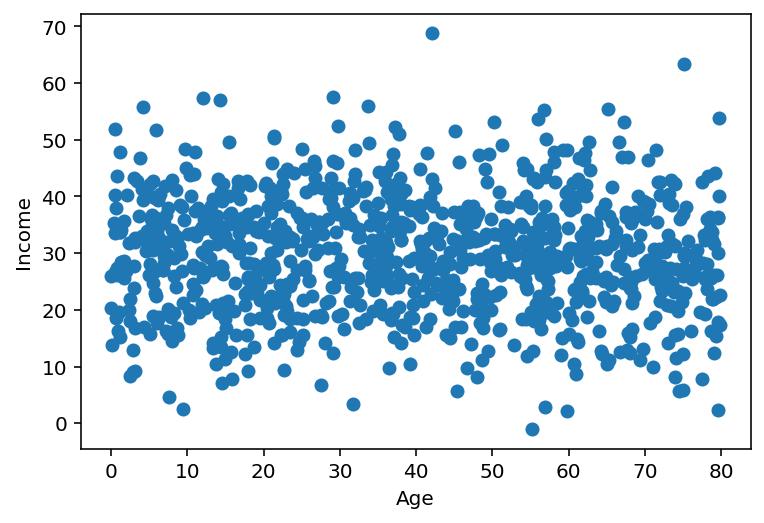

Pearsons correlation coefficient = -0.034 (p=0.283)


In [26]:
### BEGIN SOLUTION
from scipy.stats import pearsonr
plt.scatter(age, income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(age, income)[0], pearsonr(age, income)[1]))
### END SOLUTION


In [27]:
assert pearsonr(age, income)[0] < 0.1
assert pearsonr(age, income)[1] > 0.1

Hopefully you have found that these two arrays are weakly and non-significantly (p>0.05) correlated, this is because the two arrays were created independantly. Next, we are going to look at simulating data in which income is related to age. In order to do this, **set up income so that its mean is no longer a single value but instead is a function of age, specifically it is is 0.2*age. Create the same plot and calculate the Pearson correlation as above with income defined in this new way.**

Note that `np.clip` will be useful to ensure that you do not get anyone with negative income.

Pearsons correlation coefficient = 0.393 (p=0.000)


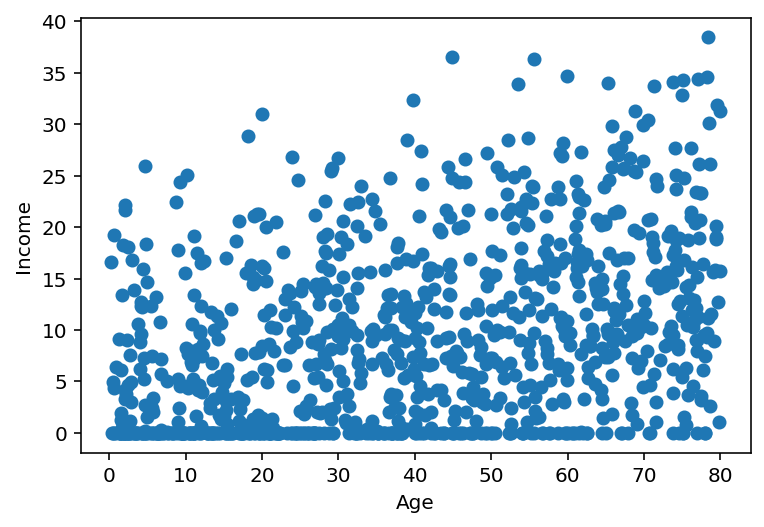

In [28]:
### BEGIN SOLUTION
age = uniform.rvs(size=1000)*80
income = np.clip(norm.rvs(age*0.2, 10, size=1000), 0, np.inf)
plt.scatter(age, income)
plt.xlabel('Age')
plt.ylabel('Income');

print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(age, income)[0], pearsonr(age, income)[1]))
### END SOLUTION

In [15]:
assert pearsonr(age, income)[0] > 0.1
assert pearsonr(age, income)[1] < 0.05

# Part III : OLS

We will now perform ordinary least squares (OLS) to see if we can recover the coefficient we used to simulate the data. For this we will use the library `statsmodels` (imported below for you). **Look at the method OLS and by using the example in its documenation or the see if you can fit a linear model between the arrays age and income to see if you can recover the coefficient we used to generate the data. Call the model you fit `results`.** 

In [30]:
import statsmodels.api as sm

### BEGIN SOLUTION
model = sm.OLS(income, age)
results = model.fit()
### END SOLUTION

Once you've fit your model, you should be able to **use the method `summary` on your `results` bject to see if you've recovered the coefficient we previously specified during model generation.**

In [31]:
### BEGIN SOLUTION
results.summary()
### END SOLUTION

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.584
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              1400.
Date:                Fri, 05 Feb 2021   Prob (F-statistic):                   3.10e-192
Time:                        16:25:32   Log-Likelihood:                         -3516.5
No. Observations:                1000   AIC:                                      7035.
Df Residuals:                     999   BIC:                                      7040.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2095      0.006     37.414      0.000       0.199       0.221
==============================================================================
Omnibus:                       41.823   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.457
Skew:                           0.528   Prob(JB):                     8.17e-11
Kurtosis:                       2.982   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret your results in the cell below. What's the coefficient? Standard error? What's the relationship between age and income in these simulated data?